In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [35]:
%config InlineBackend.figure_format = 'retina'

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import statsmodels.api as sm

In [38]:
from datetime import datetime

## Loading Dataset & Filtering

In [39]:
df = pd.read_csv("pedidos_magalu.csv", sep=',', date_parser='data')

FileNotFoundError: [Errno 2] No such file or directory: 'pedidos_magalu.csv'

In [ ]:
df['data'] = pd.to_datetime(df['data'])

In [ ]:
df.columns = ['date', 'orders']

## Converting to Timeseries

In [ ]:
df = df.set_index('date')
timeseries = pd.Series(data=df['orders'])

## Data Health Checking

In [11]:
timeseries.isna().sum()

0

## First Plot

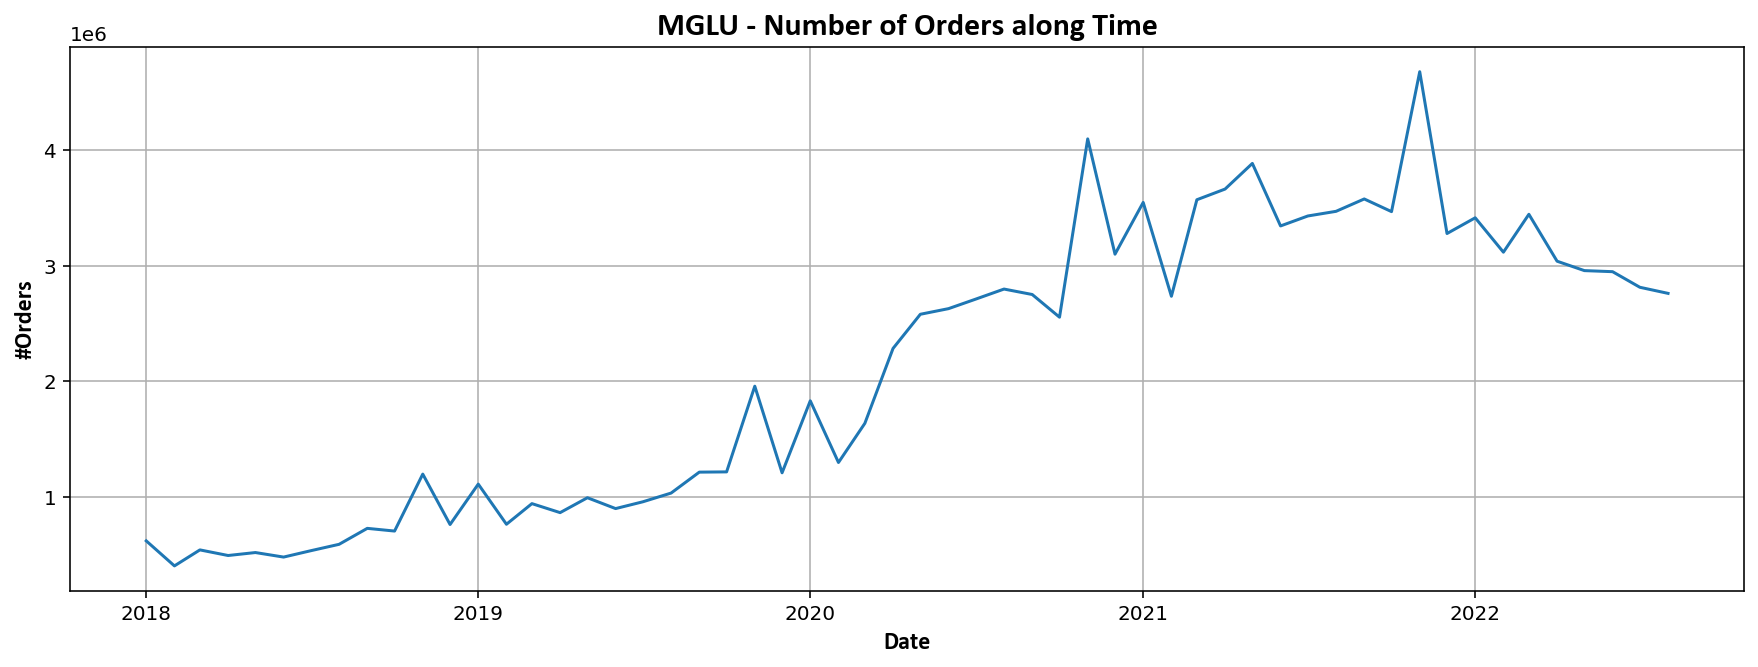

In [12]:
# # Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
hfont = {'fontname':'Calibri'}

sns.lineplot(data=timeseries, ax=ax, linestyle='-');
plt.title("MGLU - Number of Orders along Time", fontsize=16, fontdict=dict(weight='bold'), **hfont)
ax.set_xlabel("Date", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.set_ylabel("#Orders", fontsize=12, fontdict=dict(weight='bold'), **hfont);
ax.grid()

## Mutianual Stacked Plot

In [13]:
# !Deprecated
bianual_timeseries = (
    timeseries[(timeseries.index >= datetime(year=1998, month=1, day=1)) & 
               (timeseries.index <= datetime(year=2000, month=1, day=1))
              ]
)

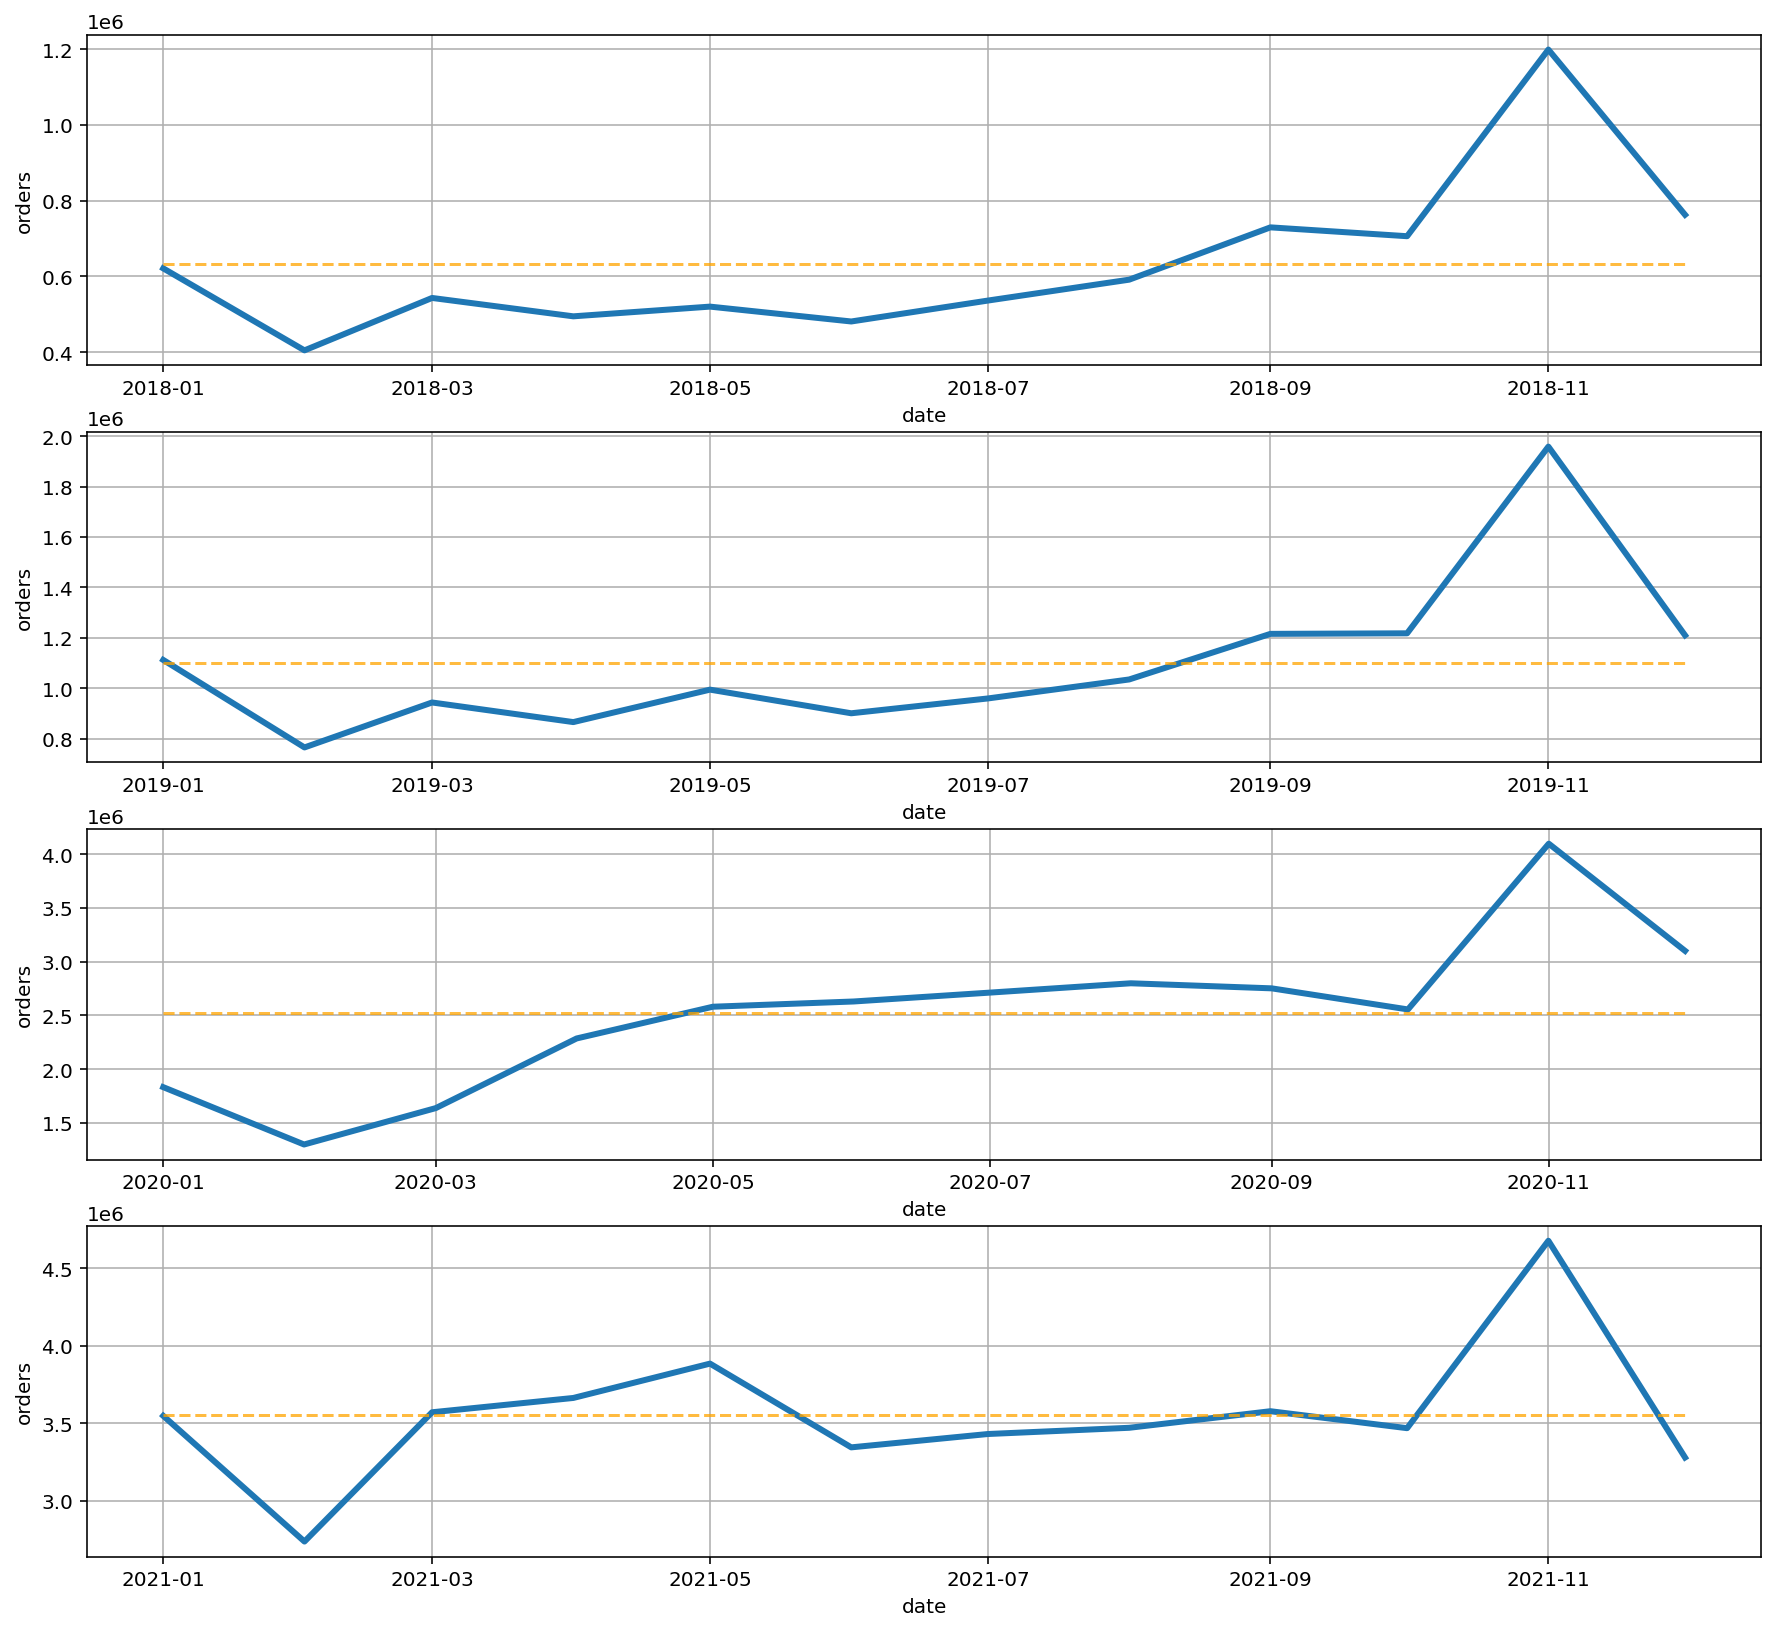

In [14]:
years = timeseries.index.year.unique().values

years = [2018, 2019, 2020, 2021]

fig, ax = plt.subplots(nrows=len(years), figsize = (15,14))

for i, y in enumerate(years):
    d = timeseries[(timeseries.index.year == y)]

    fit = sm.tsa.STL(d).fit()
    sns.lineplot(data=d, ax=ax[i], linestyle='-', linewidth=3);
    sns.lineplot(data=fit.trend, ax=ax[i], linestyle='--', alpha=.75, color='orange');
    ax[i].grid();


In [15]:
fit = sm.tsa.STL(timeseries).fit()

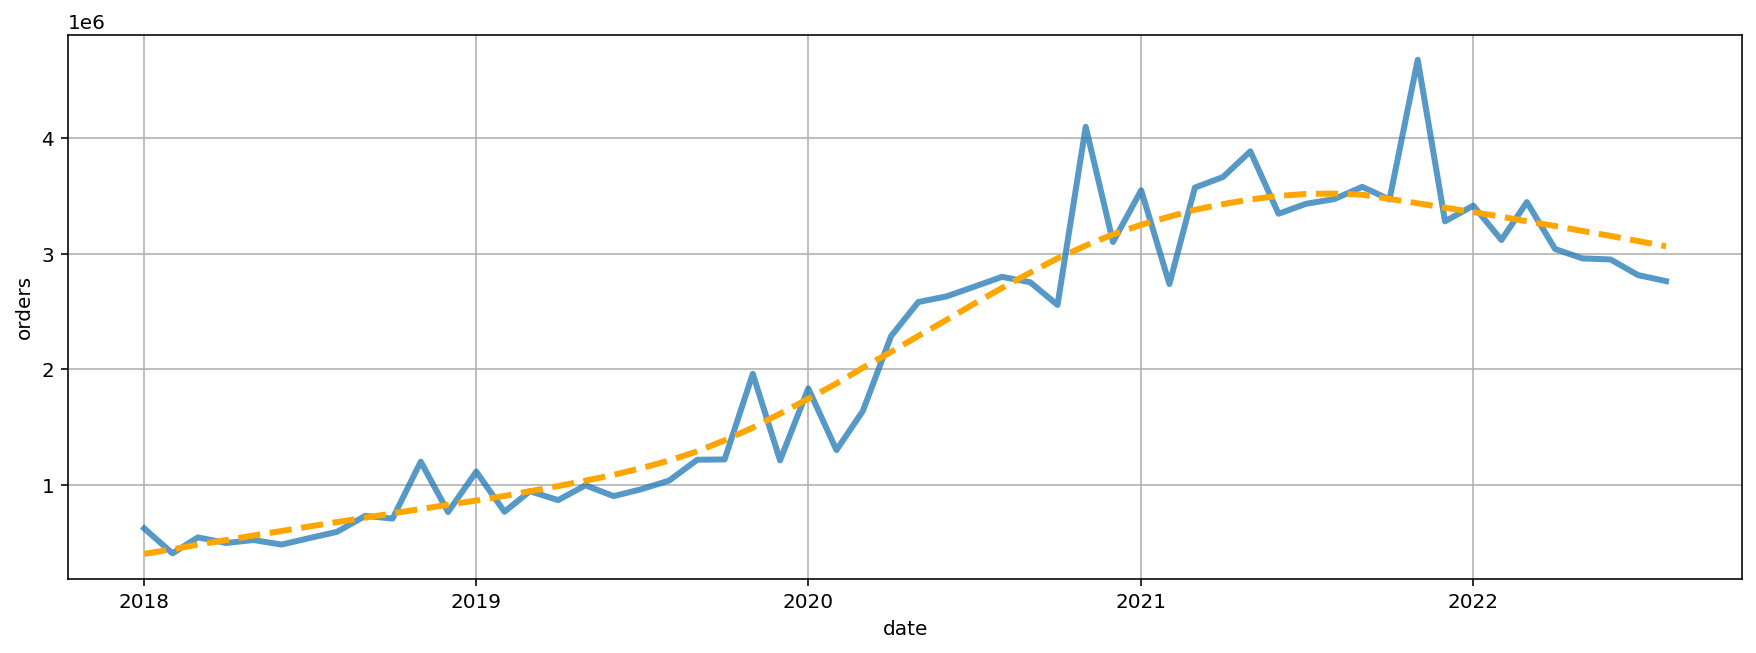

In [16]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))

sns.lineplot(data=timeseries, ax=ax, linestyle='-', alpha=.75, linewidth=3);
sns.lineplot(data=fit.trend, ax=ax, linestyle='--', color='orange', linewidth=3);
ax.grid();

## Ploting ACF

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

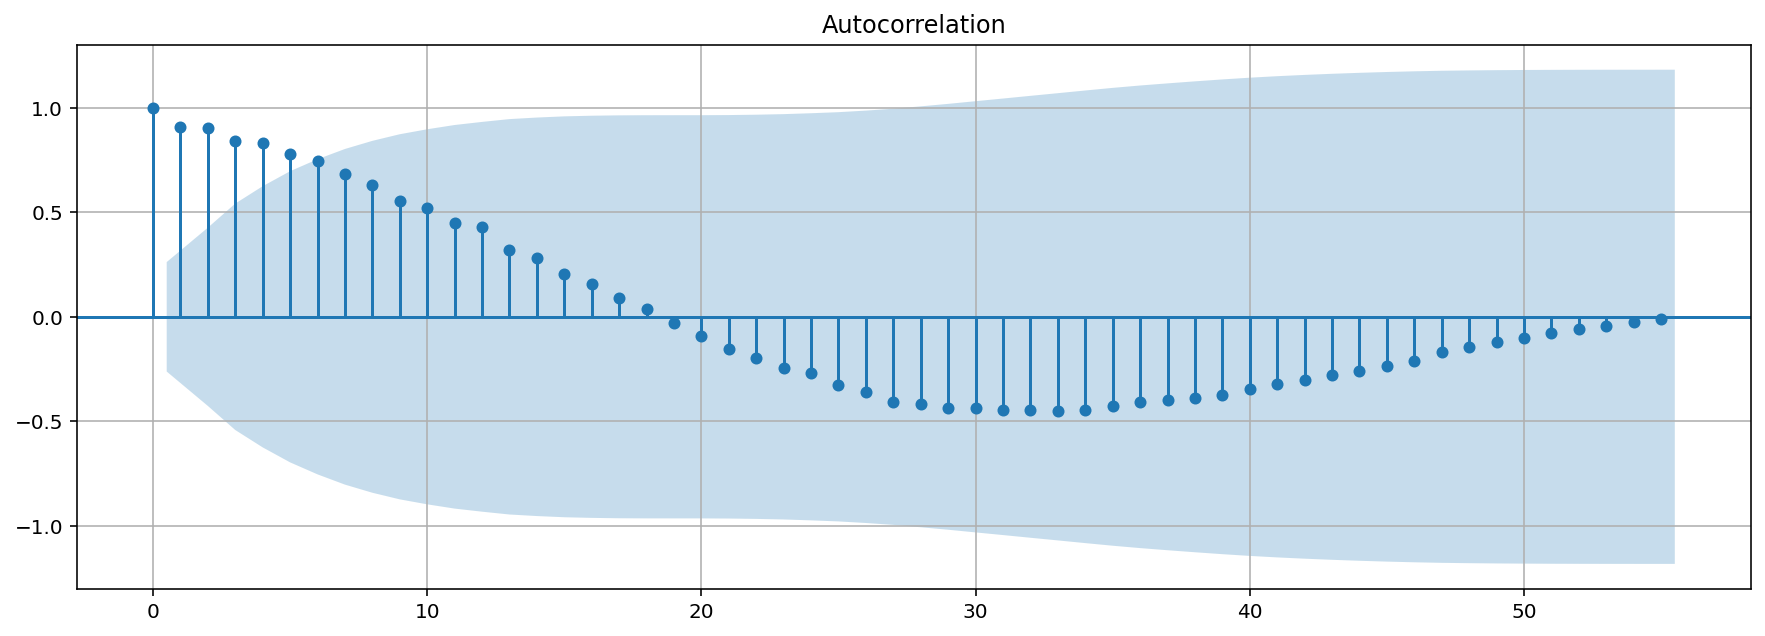

In [18]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(timeseries, lags=55, ax=ax);
ax.grid()

## Getting the Differences

In [19]:
# Inbuilt function
diff_timeseries = timeseries.diff()

In [20]:
diff_timeseries = diff_timeseries.dropna()

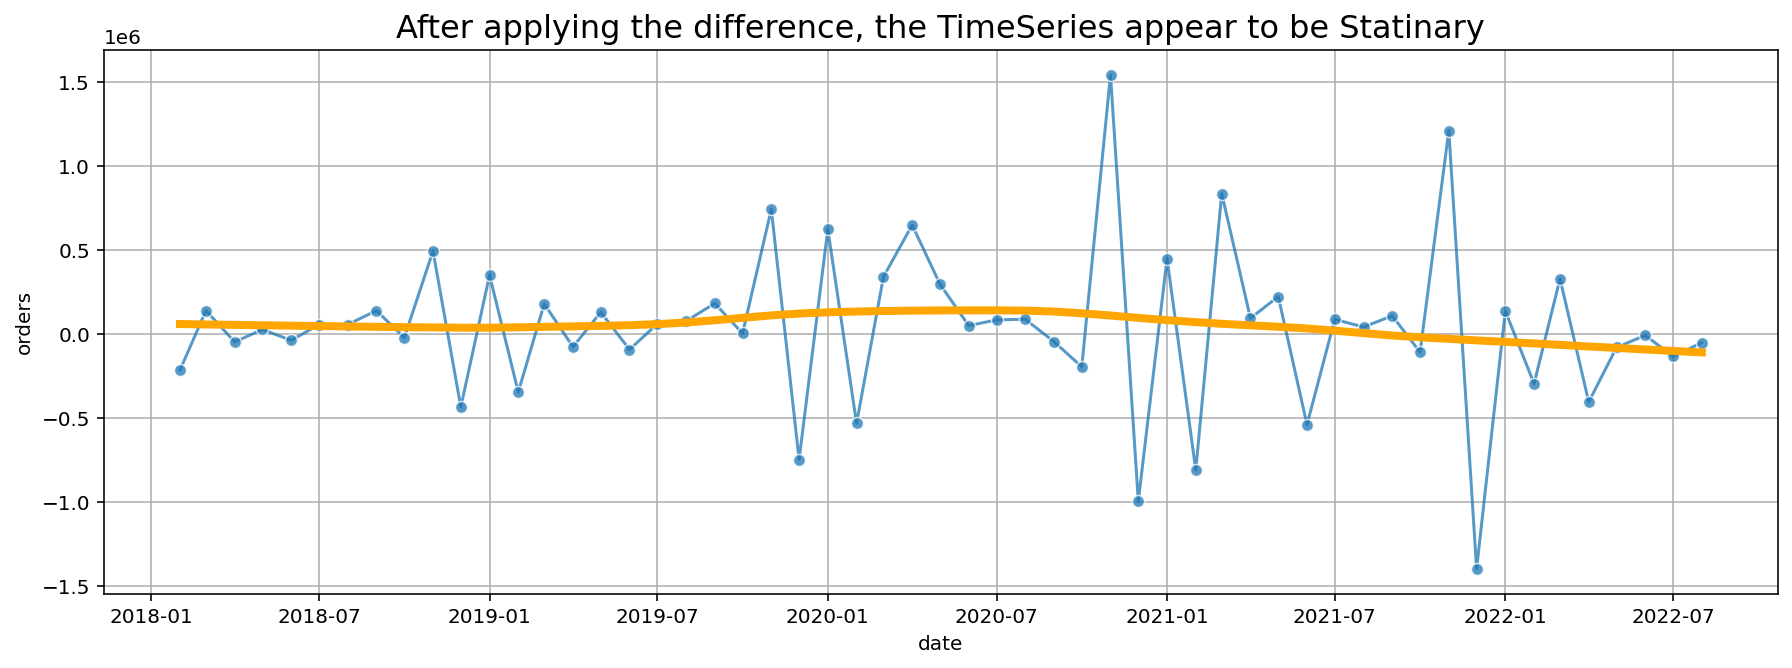

In [21]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))

sns.lineplot(data=diff_timeseries, ax=ax, linestyle='-', alpha=.75, marker='o');

fit = sm.tsa.STL(diff_timeseries).fit()

plt.title("After applying the difference, the TimeSeries appear to be Statinary", fontsize=16)
sns.lineplot(data=fit.trend, ax=ax, linestyle='-', color='orange', linewidth=4);
ax.grid();

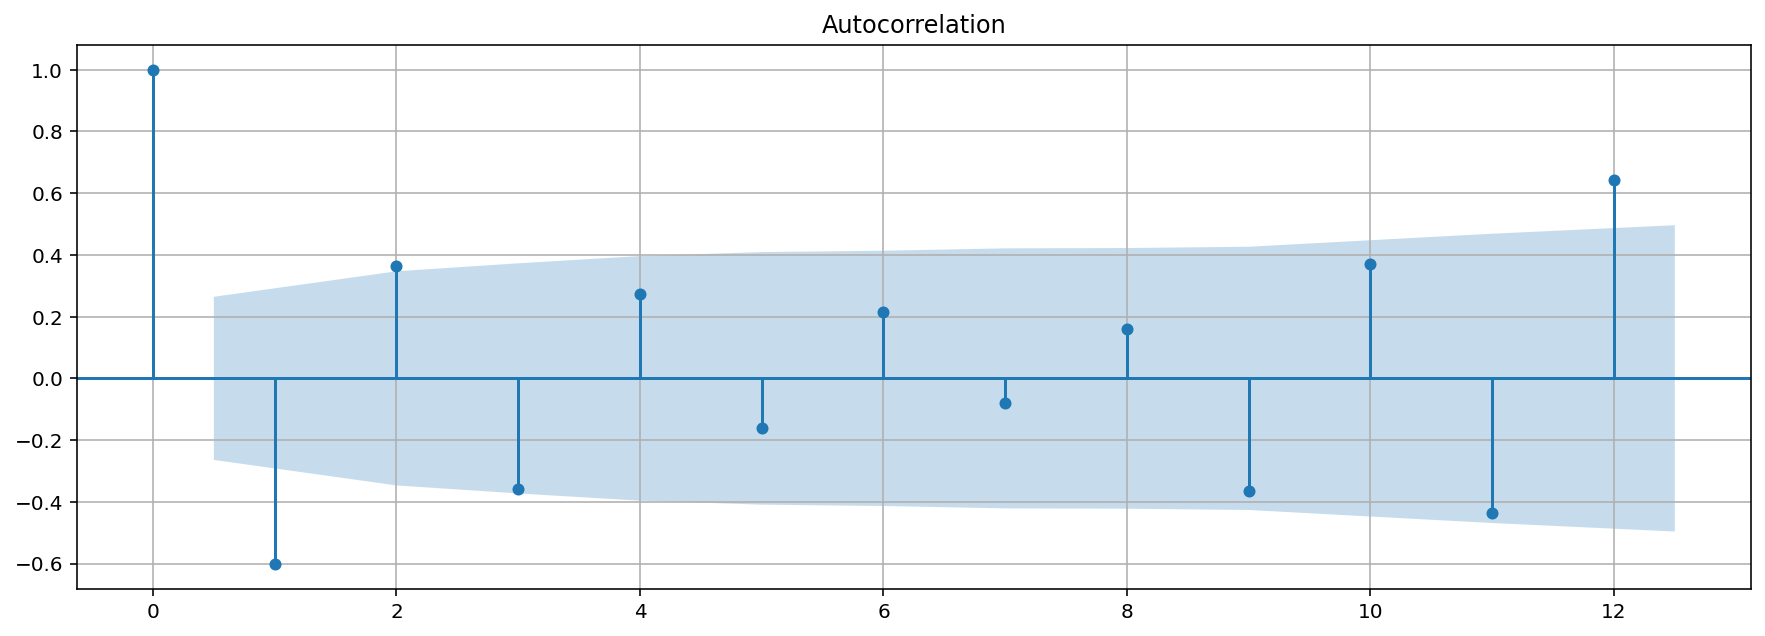

In [22]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_acf(diff_timeseries, lags=12, ax=ax);
ax.grid()

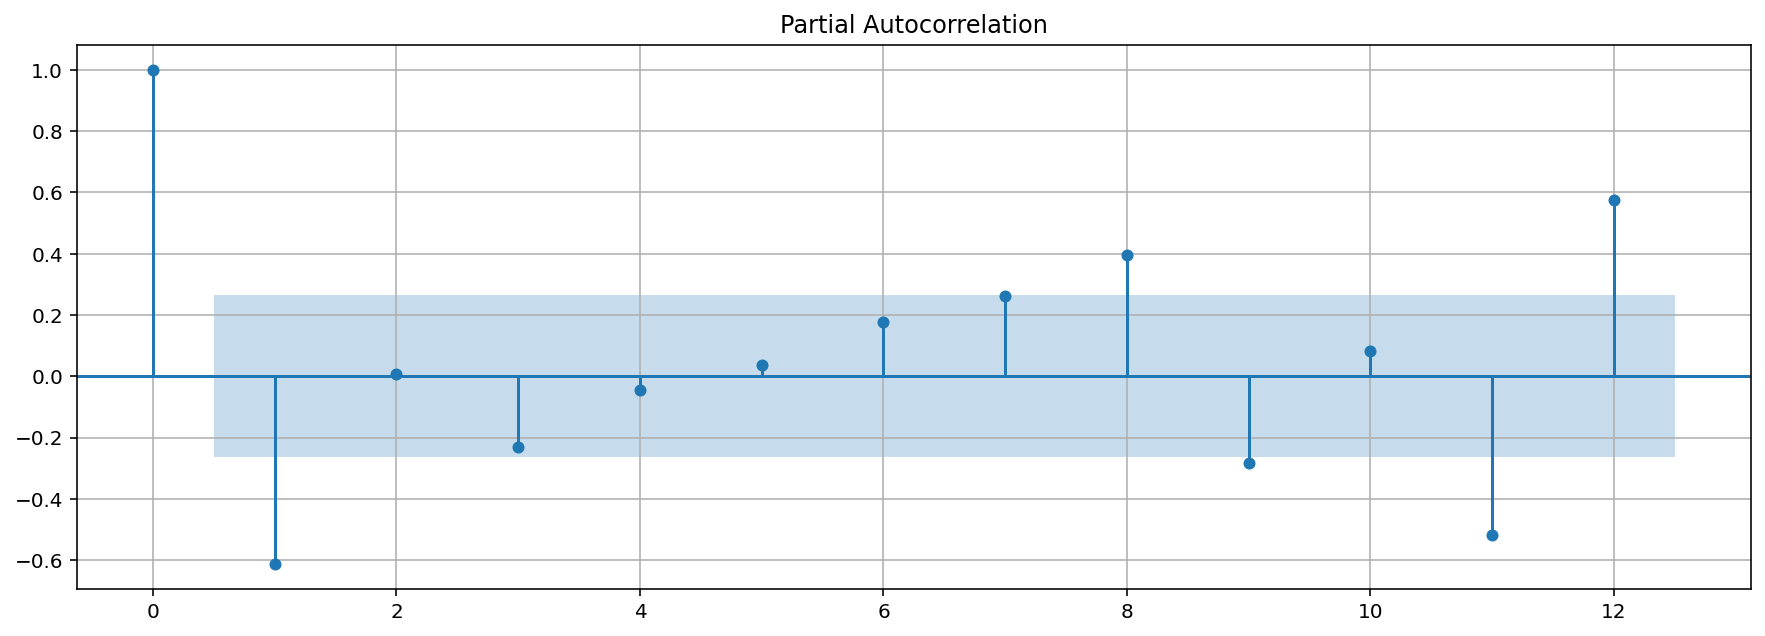

In [23]:
fig, ax = plt.subplots(ncols=1, figsize = (15,5))
plot_pacf(diff_timeseries, lags=12, ax=ax);
ax.grid()

## Testing Unitary Root - ADF

- **null hypothesis** -> THERE IS A UNIT ROOT
- **alt hypothesis** -> THERE IS A UNIT ROOT

The **null hypothesis** of the Augmented Dickey-Fuller is that there is a unit
root, with the alternative that there is no unit root. If the pvalue is
above a critical size, then we cannot reject that there is a unit root.

In [24]:
# calculate the stationarity of a random walk
from statsmodels.tsa.stattools import adfuller

def adf_testing(s):
    result = adfuller(s)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [25]:
adf_testing(timeseries)

ADF Statistic: -1.091629
p-value: 0.718399
Critical Values:
	1%: -3.589
	5%: -2.930
	10%: -2.603


    This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

In [26]:
adf_testing(diff_timeseries)

ADF Statistic: -0.267660
p-value: 0.929961
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


    This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

## Testing...

In [27]:
! git init

Initialized empty Git repository in C:/Users/caio.cabral/Desktop/INSPER/Financial Analytics/.git/
